# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.328933e+01     1.574537e+01
 * time: 0.004332065582275391
     1     6.249988e+01     1.136434e+01
 * time: 0.012451887130737305
     2     5.843523e+01     1.269325e+01
 * time: 0.030807018280029297
     3     4.284419e+01     1.122414e+01
 * time: 0.05566096305847168
     4     3.577258e+01     1.115266e+01
 * time: 0.0811460018157959
     5     1.483895e+01     3.205721e+00
 * time: 0.1055610179901123
     6     1.170255e+01     4.306175e+00
 * time: 0.21496796607971191
     7     9.863792e+00     2.593219e+00
 * time: 0.23435592651367188
     8     9.346351e+00     6.517527e+00
 * time: 0.25028300285339355
     9     8.411981e+00     2.626955e+00
 * time: 0.2691619396209717
    10     7.433930e+00     2.324791e+00
 * time: 0.2874720096588135
    11     7.089973e+00     3.108904e+00
 * time: 0.30205488204956055
    12     6.671276e+00     2.402858e+00
 * time: 0.3167839050292969
    13     6.261335e+00     1.567898e+00
 * time: 0

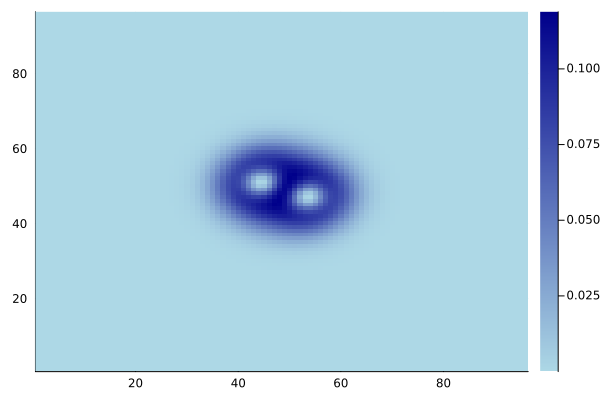

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)